# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.decomposition import PCA

# Definitions

In [14]:
week_day_names = {
    "Monday": 1, 
    "Tuesday": 2, 
    "Wednesday": 3, 
    "Thursday": 4, 
    "Friday": 5, 
    "Saturday": 6, 
    "Sunday": 7
}
source_columns = {
    'location':'source',
    'temp':'source_temp',
    'clouds': 'source_clouds',
    'pressure':'source_pressure',
    'rain': 'source_rain',
    'humidity':'source_humidity',
    'wind':'source_wind'
}
destination_columns = {
    'location':'destination',
    'temp':'destination_temp',
    'clouds': 'destination_clouds',
    'pressure':'destination_pressure',
    'rain': 'destination_rain',
    'humidity':'destination_humidity',
    'wind':'destination_wind'
}
cab_type_dict = {
    'Lyft': 0,
    'Uber': 1
}

# Functions

In [27]:
def draw_heatmap(train, name = ""):
    colormap = plt.cm.viridis
    plt.figure(figsize=(24,24))
    plt.title("Pearson Correlation of Features " + name, y=1.05, size=15)
    sns.heatmap(train.astype(float).corr(),linewidths=0.01,vmax=1.0,
    square=True, cmap=colormap, linecolor='white', annot=True)

In [28]:
def convert(base):
    return_base = []
    for b in base:
        return_base.append(int(b[1:]))
    return return_base

def analyze_dataframe_basic(filename, sourcepath = "..\\data\\data_refactored\\", n=2):
    """Odczyt danych z pliku, podstawowa analiza PCA"""
    filepath = sourcepath+filename
    train = pd.read_csv(filepath)
    train = train.drop('Date/Time', axis=1)
    train = train.drop('Year', axis=1)
    train = train.replace({"Day_Name": week_day_names})
    train['Base'] = convert(train['Base'])
    print()
    print(train.head())
    draw_heatmap(train, filename) 
    
def analyze_dataframe_radial(filename, sourcepath = "..\\data\\data_refactored\\", n=2):
    """Odczyt danych z pliku, podstawowa analiza PCA"""
    filepath = sourcepath+filename
    train = pd.read_csv(filepath)
    train = train.drop('Date/Time', axis=1)
    train = train.drop('Year', axis=1)
    lat_mean, lon_mean = np.mean(train['Lat']), np.mean(train['Lon'])
    train['Radius'] = np.sqrt((train['Lat'] - lat_mean) ** 2 + (train['Lon'] - lon_mean) ** 2)
    train['Sin'] = train['Lon'] / train['Radius']
    train['Cos'] = train['Lat'] / train['Radius']
    train = train.drop('Lon', axis=1)
    train = train.drop('Lat', axis=1)
    train = train.replace({"Day_Name": week_day_names})
    train['Base'] = convert(train['Base'])
    train['Base'] -= min(train['Base'])
    print()
    print(train.head())
    draw_heatmap(train, filename)

# uber-raw-data-14.csv


       Lat      Lon  Base  Month  Day  Day_Name  Minutes
0  40.7690 -73.9549  2512      4    1         2       11
1  40.7267 -74.0345  2512      4    1         2       17
2  40.7316 -73.9873  2512      4    1         2       21
3  40.7588 -73.9776  2512      4    1         2       28
4  40.7594 -73.9722  2512      4    1         2       33


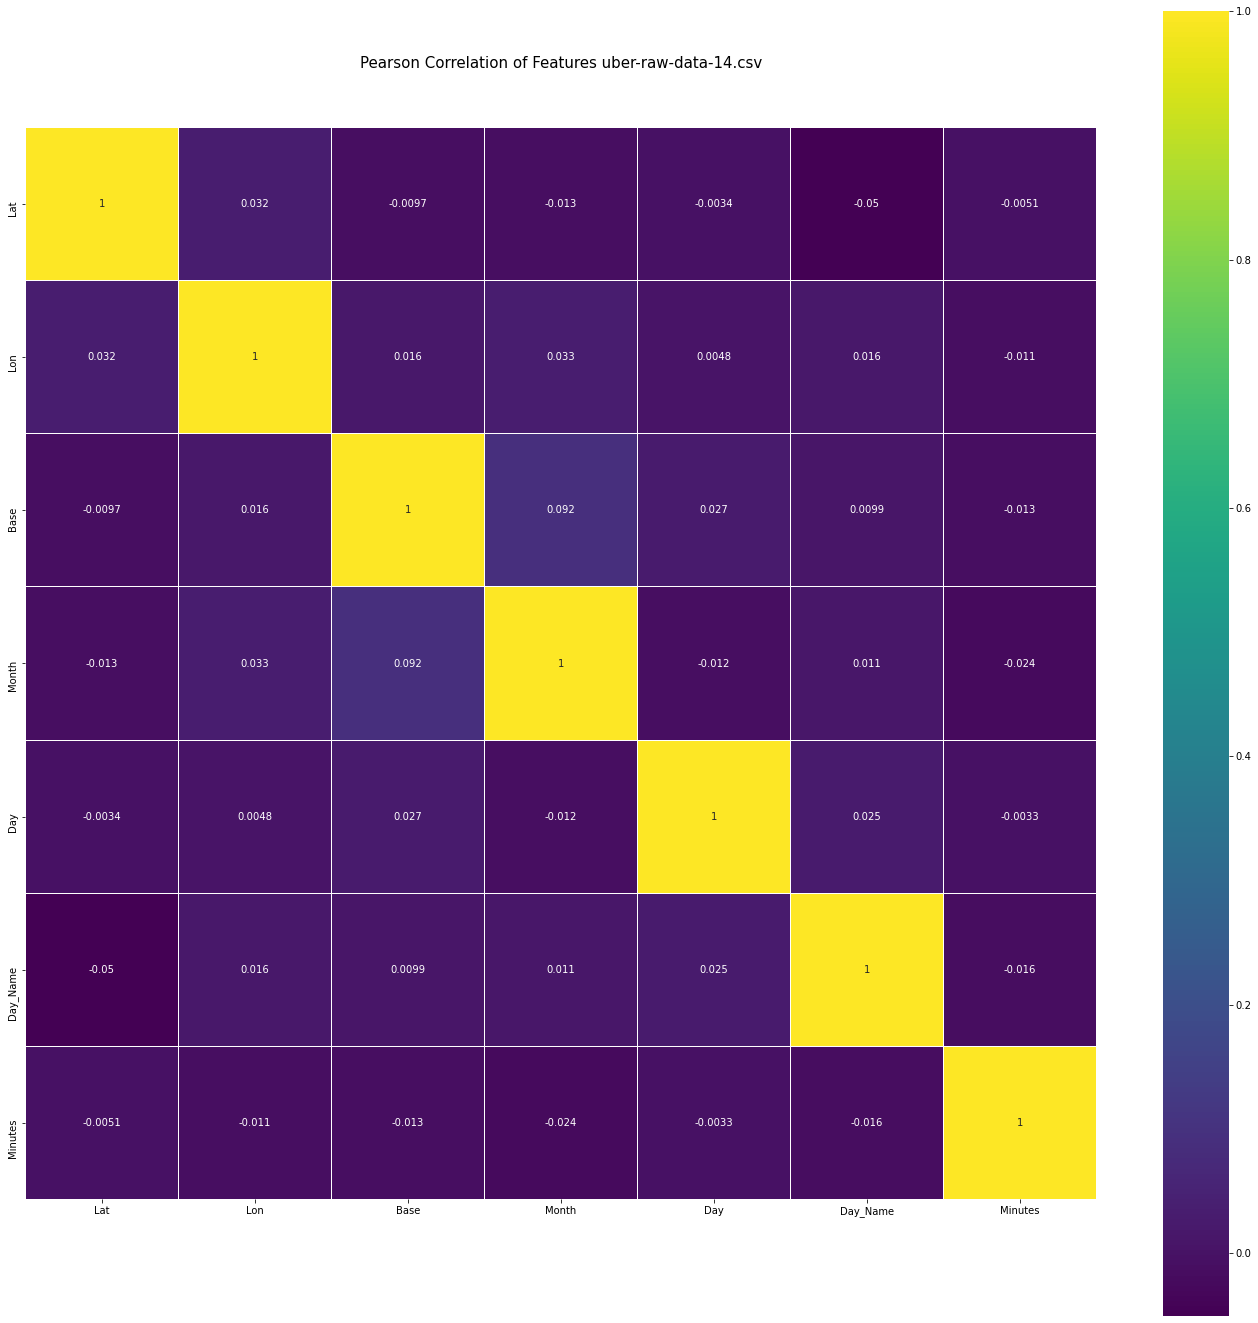

In [29]:
analyze_dataframe_basic("uber-raw-data-14.csv")


   Base  Month  Day  Day_Name  Minutes    Radius          Sin          Cos
0     0      4    1         2       11  0.034824 -2123.656533  1170.704757
1     0      4    1         2       17  0.062751 -1179.820548   649.024408
2     0      4    1         2       21  0.016206 -4565.514992  2513.414200
3     0      4    1         2       28  0.020069 -3686.163800  2030.933865
4     0      4    1         2       33  0.020156 -3670.001194  2022.206270


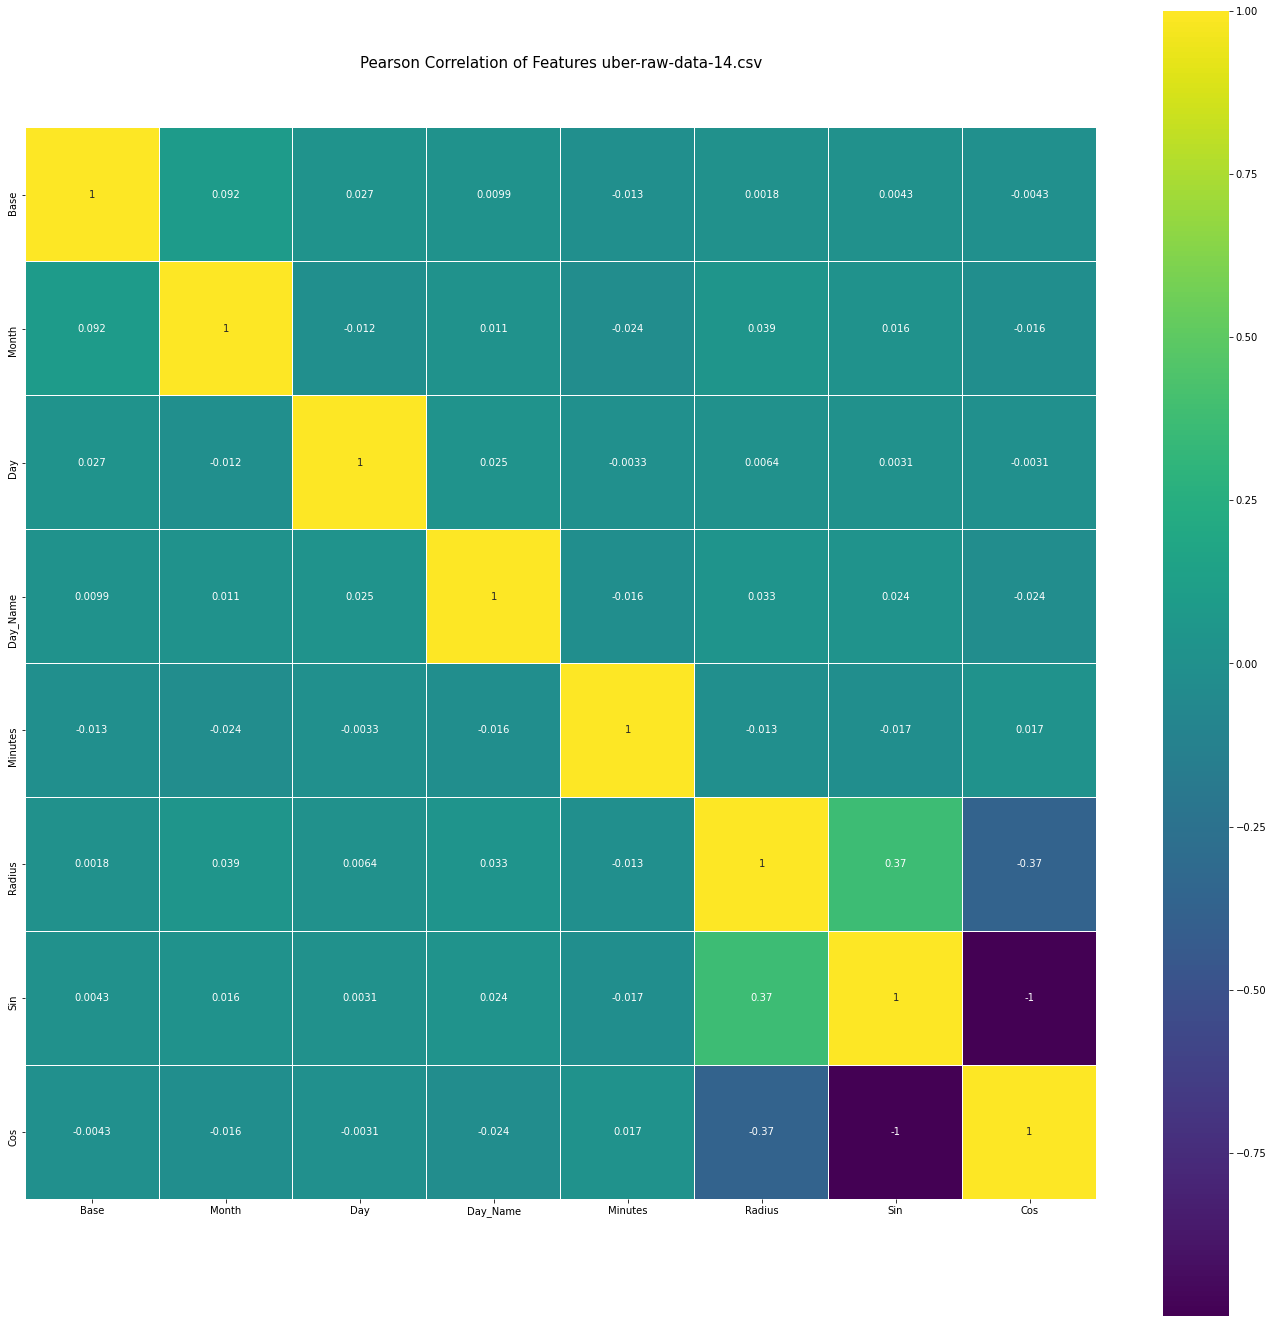

In [30]:
analyze_dataframe_radial("uber-raw-data-14.csv")

# Cub Rides Prices

In [31]:
def merge_dataframes(path="..\\data\\cab_rides\\"):
    filename_1, filename_2 = "cab_rides.csv", "weather.xls"
    prices_dataframe = pd.read_csv(path + filename_1).dropna(axis=0).reset_index(drop=True)
    prices_dataframe = prices_dataframe.drop('id', axis=1)
    weather_dataframe = pd.read_csv(path + filename_2).fillna(0).drop('time_stamp', axis=1)
    weather_dataframe = weather_dataframe.groupby('location').mean().reset_index(drop=False)
    src_weather_dataframe = weather_dataframe.rename(columns=source_columns)
    des_weather_dataframe = weather_dataframe.rename(columns=destination_columns)
    data = prices_dataframe.merge(src_weather_dataframe, on='source').merge(des_weather_dataframe, on='destination')
    return data

def onehot_encode(data, column, prefix):
    onehot_columns = pd.get_dummies(data[column], prefix=prefix)
    data = data.drop(column, axis=1)
    data = pd.concat([data, onehot_columns], axis=1)    
    return data

def refactor_data(data):
    data['cab_type'] = data['cab_type'].replace(cab_type_dict)
    data = onehot_encode(data, column='destination', prefix='destination')
    data = onehot_encode(data, column='source', prefix='source')
    data = onehot_encode(data, column='product_id', prefix='product_id')
    data = onehot_encode(data, column='name', prefix='name')
    return data    

def analyze_dataframe_basic(sourcepath="..\\data\\cab_rides\\", n=2):
    data = merge_dataframes(sourcepath)
    data = refactor_data(data)
    draw_heatmap(data, "cab_rides")

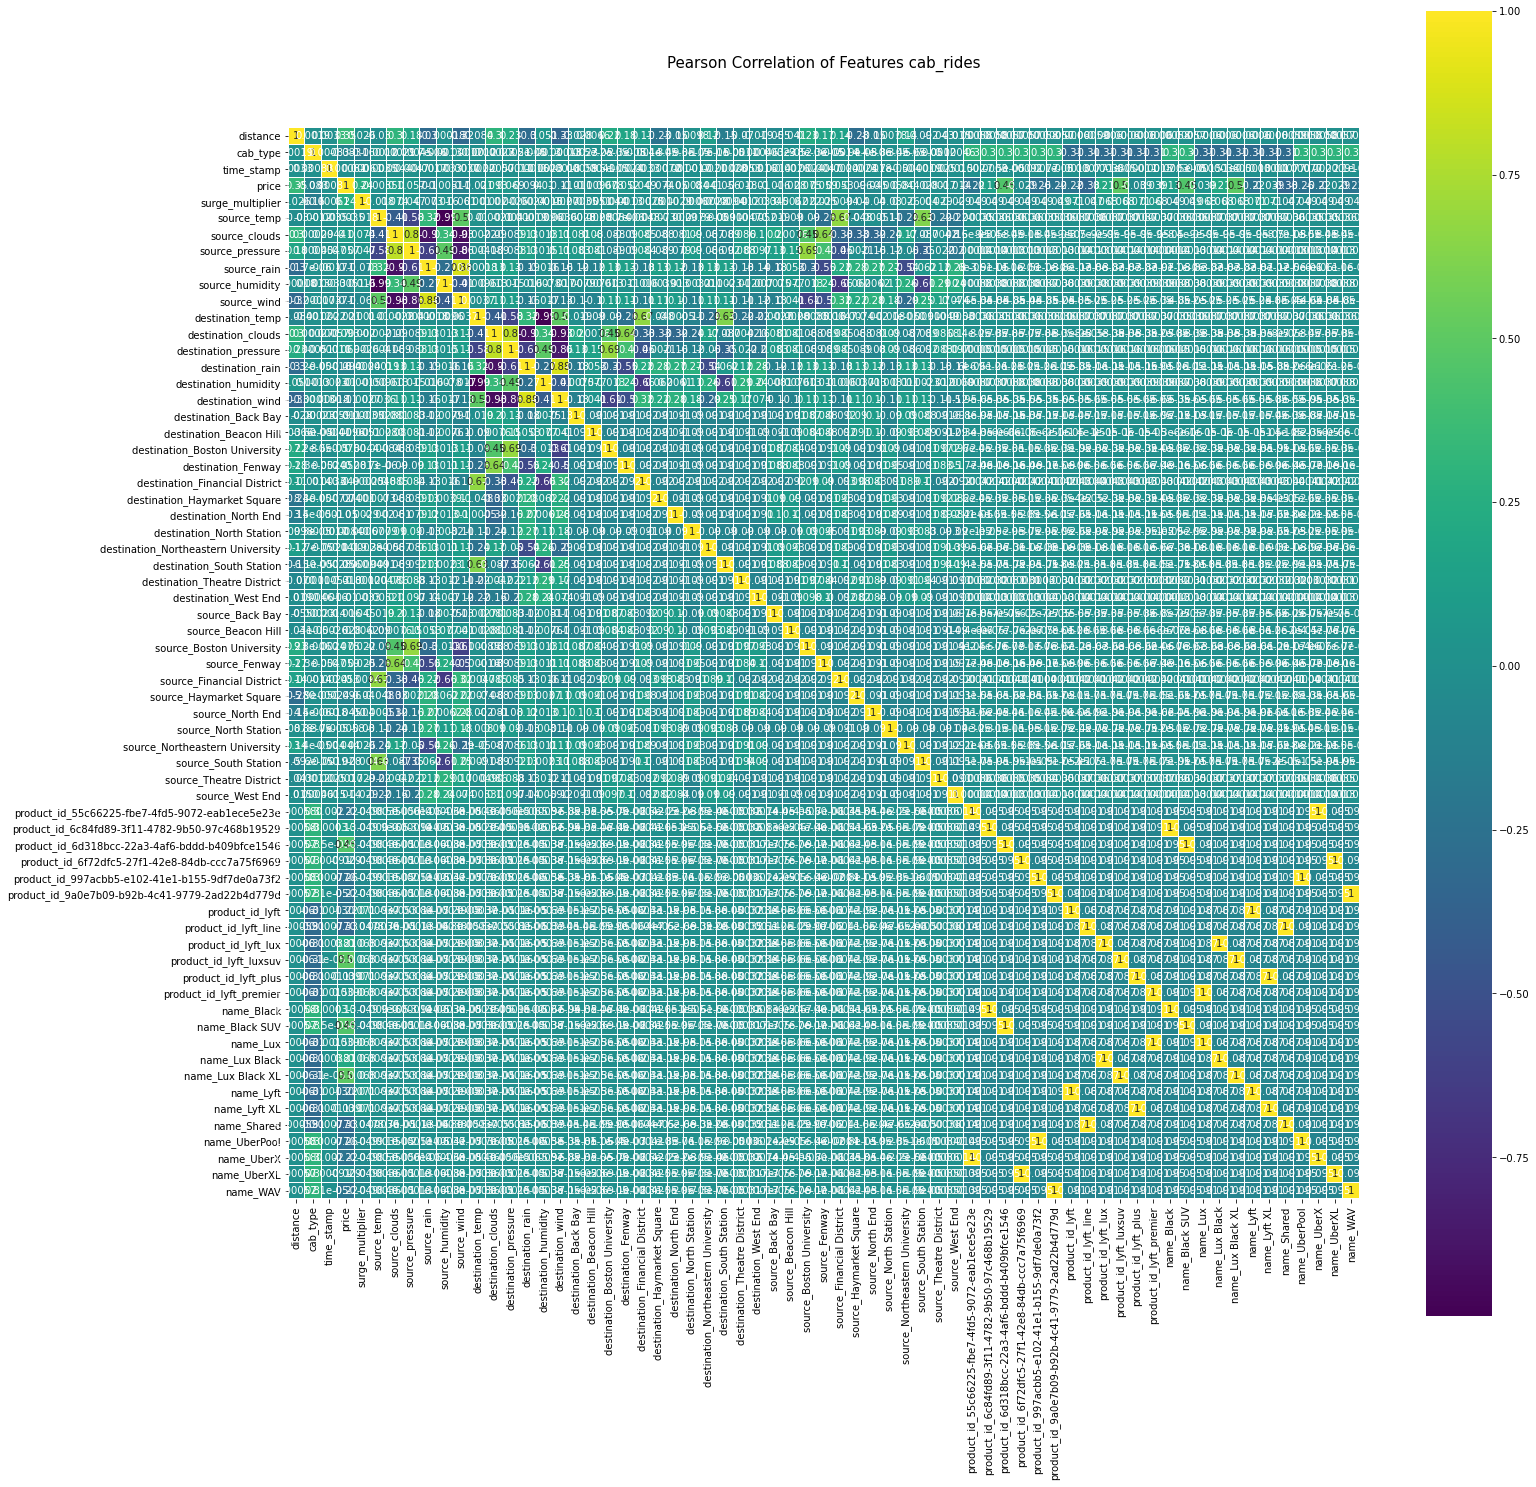

In [32]:
analyze_dataframe_basic()